In [103]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

In [104]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar100.load_data()

In [105]:
train_images.shape

(50000, 32, 32, 3)

In [106]:
test_images.shape

(10000, 32, 32, 3)

In [107]:
train_labels.shape

(50000, 1)

In [108]:
test_labels.shape

(10000, 1)

In [109]:
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

In [110]:
def rgb_to_grayscale(images):
    grayscale = tf.image.rgb_to_grayscale(images)
    return grayscale
train_images_gray = rgb_to_grayscale(train_images)
test_images_gray = rgb_to_grayscale(test_images)
train_images_gray = train_images_gray.numpy()
test_images_gray = test_images_gray.numpy()

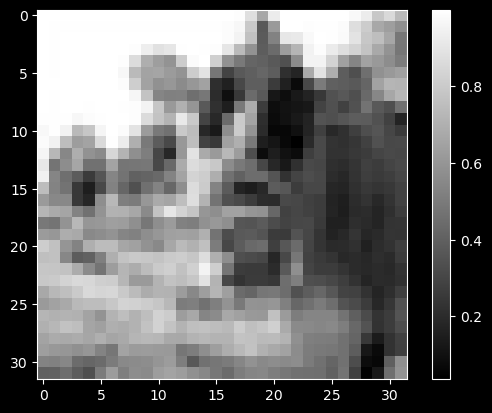

In [111]:
plt.figure()
plt.imshow(train_images_gray[0],cmap = plt.cm.gray)
plt.colorbar()
plt.grid(False)
plt.show()

In [112]:
train_labels_one_hot = to_categorical(train_labels,num_classes = 100)

In [113]:
test_labels_one_hot = to_categorical(test_labels,num_classes = 100)

In [114]:
ann_model = keras.Sequential([
    keras.Input(shape=(32, 32, 1)),
    keras.layers.Flatten(),
    keras.layers.Dense(512,activation='relu'),
    keras.layers.Dense(256,activation='relu'),
    keras.layers.Dense(100,activation='softmax')
])
ann_model.compile(optimizer = 'adam',
                  loss = 'categorical_crossentropy',
                  metrics = ['accuracy'])
ann_model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_13 (Flatten)            │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 100)            │        25,700 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 681,828 (2.60 MB)

 Trainable params: 681,828 (2.60 MB)

 Non-trainable params: 0 (0.00 B)

In [115]:
ann_model.fit(train_images_gray,
              train_labels_one_hot,
              epochs = 100,
              batch_size = 50,
              validation_data = (test_images_gray,test_labels_one_hot))

Epoch 1/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.0468 - loss: 4.3475 - val_accuracy: 0.0744 - val_loss: 4.1820
Epoch 2/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.0839 - loss: 4.1022 - val_accuracy: 0.0956 - val_loss: 4.0616
Epoch 3/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.1022 - loss: 3.9902 - val_accuracy: 0.1116 - val_loss: 3.9763
Epoch 4/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.1185 - loss: 3.9027 - val_accuracy: 0.1190 - val_loss: 3.9467
Epoch 5/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.1295 - loss: 3.8398 - val_accuracy: 0.1187 - val_loss: 3.9327
Epoch 6/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.1361 - loss: 3.7852 - val_accuracy: 0.1350 - val_loss: 3.8652
Epoch 7/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.1445 - loss: 3.7330 - val_accuracy: 0.1377 - val_loss: 3.8436
Epoch 8/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.1516 - loss: 3

In [116]:
basic_cnn = keras.Sequential([
    keras.Input(shape=(32,32,1)),
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(100, activation='softmax')
])
basic_cnn.compile(optimizer = 'adam',
                  loss = 'categorical_crossentropy',
                  metrics = ['accuracy'])
ann_model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_13 (Flatten)            │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 100)            │        25,700 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,045,486 (7.80 MB)

 Trainable params: 681,828 (2.60 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,363,658 (5.20 MB)

In [117]:
basic_cnn.fit(
    train_images_gray,
    train_labels_one_hot,
    epochs = 100,
    batch_size = 50,
    validation_data = (test_images_gray,test_labels_one_hot)
)

Epoch 1/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 17s 15ms/step - accuracy: 0.1047 - loss: 3.9779 - val_accuracy: 0.1737 - val_loss: 3.5202
Epoch 2/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.2247 - loss: 3.2461 - val_accuracy: 0.2448 - val_loss: 3.1251
Epoch 3/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.2964 - loss: 2.8631 - val_accuracy: 0.2848 - val_loss: 2.9442
Epoch 4/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.3511 - loss: 2.5828 - val_accuracy: 0.3088 - val_loss: 2.8573
Epoch 5/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.4008 - loss: 2.3286 - val_accuracy: 0.3118 - val_loss: 2.8247
Epoch 6/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.4566 - loss: 2.0855 - val_accuracy: 0.3233 - val_loss: 2.8441
Epoch 7/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.5065 - loss: 1.8567 - val_accuracy: 0.3239 - val_loss: 2.8917
Epoch 8/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 

In [118]:
np.argmax(ann_model.predict(np.expand_dims(train_images_gray[0],axis=0)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


19

In [119]:
np.argmax(basic_cnn.predict(np.expand_dims(train_images_gray[0],axis=0)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


19

In [120]:
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import ReduceLROnPlateau

# 1. Define the data augmentation block
data_augmentation = keras.Sequential([
    keras.layers.RandomFlip("horizontal"),
    keras.layers.RandomRotation(0.1),
    keras.layers.RandomZoom(0.1),
])

# 2. Define the improved model
deeper_cnn = keras.Sequential([
    keras.Input(shape=(32, 32, 1)),
    
    # Augmentation layer
    data_augmentation,

    # Convolutional blocks with padding and L2 regularization
    keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4)),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.2),

    keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4)),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.3),
    
    # Flatten and Dense layers
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(100, activation='softmax')
])

deeper_cnn.compile(optimizer='adam',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])
deeper_cnn.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_14 (Sequential)      │ (None, 32, 32, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 32, 32, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_15 (Flatten)            │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 100)            │        51,300 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,216,772 (8.46 MB)

 Trainable params: 2,215,364 (8.45 MB)

 Non-trainable params: 1,408 (5.50 KB)

In [121]:
deeper_cnn_history = deeper_cnn.fit(
    train_images_gray,
    train_labels_one_hot,
    epochs=100,
    batch_size=50,
    validation_data=(test_images_gray, test_labels_one_hot),
)

Epoch 1/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 56s 53ms/step - accuracy: 0.0882 - loss: 4.3406 - val_accuracy: 0.1727 - val_loss: 3.6421
Epoch 2/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 49s 49ms/step - accuracy: 0.1763 - loss: 3.5774 - val_accuracy: 0.2391 - val_loss: 3.2113
Epoch 3/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 63s 63ms/step - accuracy: 0.2193 - loss: 3.3052 - val_accuracy: 0.2371 - val_loss: 3.3527
Epoch 4/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 62s 62ms/step - accuracy: 0.2449 - loss: 3.1714 - val_accuracy: 0.2825 - val_loss: 3.0286
Epoch 5/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 51s 51ms/step - accuracy: 0.2699 - loss: 3.0491 - val_accuracy: 0.2953 - val_loss: 2.9349
Epoch 6/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 50s 50ms/step - accuracy: 0.2842 - loss: 2.9692 - val_accuracy: 0.2946 - val_loss: 3.0084
Epoch 7/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 59s 59ms/step - accuracy: 0.2963 - loss: 2.8932 - val_accuracy: 0.3233 - val_loss: 2.7850
Epoch 8/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 65s 65ms/step - accuracy: 

In [122]:
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

model_checkpoint_deeper_cnn = keras.callbacks.ModelCheckpoint(
    filepath='best_deeper_cnn_model_cifar_weights.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    verbose=1
)

In [123]:
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

deeper_cnn_history = deeper_cnn.fit(
    train_images_gray,
    train_labels_one_hot,
    epochs=30,
    batch_size=50,
    validation_data=(test_images_gray, test_labels_one_hot),
    callbacks=[early_stopping, model_checkpoint_deeper_cnn, lr_scheduler] # Add scheduler
)

Epoch 1/30
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.4809 - loss: 2.0459
Epoch 1: val_loss improved from None to 2.05569, saving model to best_deeper_cnn_model_cifar_weights.weights.h5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 63s 63ms/step - accuracy: 0.4800 - loss: 2.0501 - val_accuracy: 0.4902 - val_loss: 2.0557 - learning_rate: 0.0010
Epoch 2/30
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.4859 - loss: 2.0299
Epoch 2: val_loss did not improve from 2.05569
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 71s 71ms/step - accuracy: 0.4826 - loss: 2.0411 - val_accuracy: 0.4782 - val_loss: 2.1171 - learning_rate: 0.0010
Epoch 3/30
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.4847 - loss: 2.0313
Epoch 3: val_loss improved from 2.05569 to 2.01801, saving model to best_deeper_cnn_model_cifar_weights.weights.h5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 67s 67ms/step - accuracy: 0.4818 - loss: 2.0453 - val_accuracy: 0.4996 - val_loss: 2.0180 - learning_rate: 0.0010
Epoch 4/30
1000/1000 ━━━

In [124]:
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

model_checkpoint_ann = keras.callbacks.ModelCheckpoint(
    filepath='best_ann_model_cifar_weights.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    verbose=1
)

print("Training ANN model...")
ann_history = ann_model.fit(
    train_images_gray,
    train_labels_one_hot,
    epochs=30,
    batch_size=50,
    validation_data=(test_images_gray, test_labels_one_hot),
    callbacks=[early_stopping, model_checkpoint_ann]
)
print("ANN model training finished.")

Training ANN model...
Epoch 1/30
 997/1000 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3743 - loss: 2.4950
Epoch 1: val_loss improved from None to 5.85755, saving model to best_ann_model_cifar_weights.weights.h5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.3701 - loss: 2.5211 - val_accuracy: 0.1375 - val_loss: 5.8576
Epoch 2/30
 993/1000 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3775 - loss: 2.4719
Epoch 2: val_loss did not improve from 5.85755
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.3693 - loss: 2.5173 - val_accuracy: 0.1361 - val_loss: 5.9557
Epoch 3/30
 996/1000 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3821 - loss: 2.4668
Epoch 3: val_loss improved from 5.85755 to 5.81163, saving model to best_ann_model_cifar_weights.weights.h5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.3708 - loss: 2.5161 - val_accuracy: 0.1366 - val_loss: 5.8116
Epoch 4/30
 998/1000 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3831 - loss: 2.4715
Epoch 4: 

In [125]:
model_checkpoint_basic_cnn = keras.callbacks.ModelCheckpoint(
    filepath='best_basic_cnn_model_cifar_weights.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    verbose=1
)

print("Training Basic CNN model...")
basic_cnn_history = basic_cnn.fit(
    train_images_gray,
    train_labels_one_hot,
    epochs=30,
    batch_size=50,
    validation_data=(test_images_gray, test_labels_one_hot),
    callbacks=[early_stopping, model_checkpoint_basic_cnn]
)
print("Basic CNN model training finished.")

Training Basic CNN model...
Epoch 1/30
 998/1000 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9784 - loss: 0.0854
Epoch 1: val_loss improved from None to 17.76724, saving model to best_basic_cnn_model_cifar_weights.weights.h5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 18s 18ms/step - accuracy: 0.9762 - loss: 0.0961 - val_accuracy: 0.2665 - val_loss: 17.7672
Epoch 2/30
 999/1000 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9780 - loss: 0.0822
Epoch 2: val_loss improved from 17.76724 to 17.48141, saving model to best_basic_cnn_model_cifar_weights.weights.h5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 18s 18ms/step - accuracy: 0.9755 - loss: 0.0951 - val_accuracy: 0.2644 - val_loss: 17.4814
Epoch 3/30
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9784 - loss: 0.0791
Epoch 3: val_loss did not improve from 17.48141
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 19s 18ms/step - accuracy: 0.9757 - loss: 0.0930 - val_accuracy: 0.2656 - val_loss: 17.6492
Epoch 4/30
 998/1000 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accura

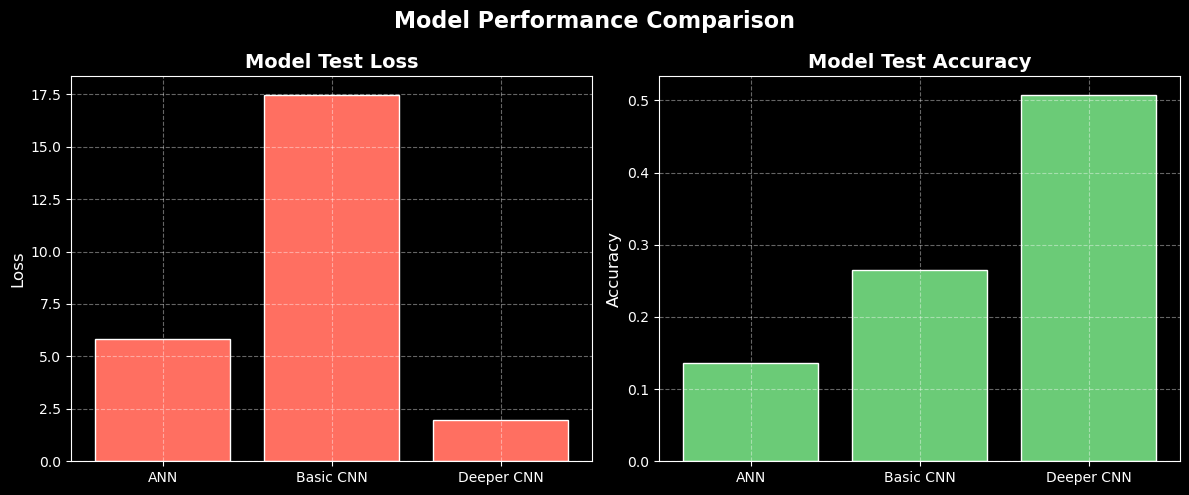

In [128]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

ann_model.load_weights('best_ann_model_cifar_weights.weights.h5')
basic_cnn.load_weights('best_basic_cnn_model_cifar_weights.weights.h5')
deeper_cnn.load_weights('best_deeper_cnn_model_cifar_weights.weights.h5')

loss_ann, accuracy_ann = ann_model.evaluate(test_images_gray, test_labels_one_hot, verbose=0)
loss_basic_cnn, accuracy_basic_cnn = basic_cnn.evaluate(test_images_gray, test_labels_one_hot, verbose=0)
loss_deeper_cnn, accuracy_deeper_cnn = deeper_cnn.evaluate(test_images_gray, test_labels_one_hot, verbose=0)


import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['ANN', 'Basic CNN', 'Deeper CNN']
losses = [loss_ann, loss_basic_cnn, loss_deeper_cnn]
accuracies = [accuracy_ann, accuracy_basic_cnn, accuracy_deeper_cnn]

# Dark mode style
plt.style.use("dark_background")

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Loss plot
axes[0].bar(models, losses, color='#FF6F61', edgecolor='white')
axes[0].set_title('Model Test Loss', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Loss', fontsize=12)
axes[0].grid(True, linestyle='--', alpha=0.4)

# Accuracy plot
axes[1].bar(models, accuracies, color='#6BCB77', edgecolor='white')
axes[1].set_title('Model Test Accuracy', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Accuracy', fontsize=12)
axes[1].grid(True, linestyle='--', alpha=0.4)

# Overall title
plt.suptitle("Model Performance Comparison", fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()


In [129]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

models = {
    "ANN": ("cyan", ann_history),
    "Basic CNN": ("magenta", basic_cnn_history),
    "Deeper CNN": ("yellow", deeper_cnn_history)
}

performance_data = {
    'Model': ['ANN', 'Basic CNN', 'Deeper CNN'],
    'Test Loss': [loss_ann, loss_basic_cnn, loss_deeper_cnn],
    'Test Accuracy': [accuracy_ann, accuracy_basic_cnn, accuracy_deeper_cnn]
}

performance_df = pd.DataFrame(performance_data)

fig = make_subplots(rows=1, cols=2, subplot_titles=('Accuracy', 'Loss'))

for name, (color, history) in models.items():
    # Accuracy
    fig.add_trace(go.Scatter(y=history.history['accuracy'], mode='lines',
                             name=name, line=dict(color=color, dash='solid')), row=1, col=1)
    fig.add_trace(go.Scatter(y=history.history['val_accuracy'], mode='lines',
                             name=name, line=dict(color=color, dash='dot'), showlegend=False), row=1, col=1)

    # Loss
    fig.add_trace(go.Scatter(y=history.history['loss'], mode='lines',
                             name=name, line=dict(color=color, dash='solid')), row=1, col=2)
    fig.add_trace(go.Scatter(y=history.history['val_loss'], mode='lines',
                             name=name, line=dict(color=color, dash='dot'), showlegend=False), row=1, col=2)

fig.update_layout(
    title_text="Model Comparison: Accuracy & Loss (Train=Solid, Val=Dot)",
    height=500,
    width=1200,
    template="plotly_dark"
)

fig.show()